# 09 - Time Series Analysis - Arima

<img src="images/time series.png" />

image source: https://medium.com/@paradistia/analisis-runtun-waktu-peramalan-fuzzy-time-series-cheng-menggunakan-microsoft-excel-b33a192013bb

**Time series is a sequence of observations recorded at regular time intervals.**

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

**Why even analyze a time series?**

Because it is the preparatory step before you develop a forecast of the series.

Besides, time series forecasting has enormous commercial significance because stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc are essentially time series data.

**So what does analyzing a time series involve?**

Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

## Komponen Data Time Series

Pola dari data time series dapat dibagi menjadi komponen-komponen berikut:
1. **Base atau Level**. Data time series yang diobservasi.
2. **Trend**. Kemiringan meningkat atau menurun yang terlihat di Time Series.
3. **Seasonality**. Pola unik yang terlihat di suatu interval waktu karena faktor musiman. Hal ini bisa karena suatu bulan di setiap tahunnya, suatu hari di setiap bulannya, atau bahkan suatu jam di dalam satu hari.
4. **Residual atau Noise atau Error**. Variasi dari data yang tidak dapat dijelaskan.

*Sebagai catatan, tidak semua data Time Series memiliki seluruh komponen diatas. Time Series akan selalu memiliki Base, rata-rata memiliki Residual, dan Trend dan Seasonality biasanya tidak harus ada.

## ARIMA (Autoregressive Integrated Moving Average)

Model ARIMA merupakan model statistik untuk menganalisis dan meramalkan data time series.

ARIMA adalah singkatan dari *AutoRegressive Integrated Moving Average* yang merupakan gabungan dari AutoRegressive dan Moving Average yang lebih sederhana dan menambahkan Integrated.
- **AR** : Autoregression. Adalah model yang menggunakan hubungan ketergantungan antara data saat ini dengan beberapa data di masa lalu.
- **I** : Integrated. Adalah penggunaan diferensiasi pada data observasi untuk membuatnya menjadi stasioner.
- **MA** : Moving Average. Adalah model yang menggunakan hubungan ketergantungan antara data saat ini dengan error dari hasil forecasting di masa lalu

Masing-masing komponen ini secara eksplisit ditentukan dalam model sebagai parameter **p, d, dan q**. biasanya model arima dinotasikan **ARIMA(p,d,q)**. masing-masing paramater tersebut didefinisikan sebagai berikut:
- p: orde untuk proses autoregressive (AR).
- d: orde yang menyatakan banyaknya proses diferensiasi yang dilakukan pada data time series yang tidak stasioner.
- q: orde yang menyatakan proses moving average (MA).

ARIMA memiliki beberapa variasi di antaranya adalah:
- **ARIMA**: ARIMA dasar yang tidak dapat digunakan pada data musiman
- **Seasonal ARIMA (SARIMA)**: digunakan untuk meramalkan data berpola musiman
- **Seasonal ARIMA with eXogenous (SARIMAX)**:  digunakan untuk meramalkan data berpola musiman dengan beberapa variabel independen yang mempengaruhinya.

## ARIMA in Python

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
"""
Dataset from: https://www.kaggle.com/rakannimer/air-passengers
International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict 
the number of international airline passengers in units of 1,000. 
The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.
"""

df = pd.read_csv('data/AirPassengers.csv')

print(df.dtypes)
df.head()

Month          object
#Passengers     int64
dtype: object


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# merubah tipe data object to datetime
df['Month'] = pd.to_datetime(df['Month'])
print(df.dtypes)

# mengurutkan data berdasarkan waktu
df = df.sort_values('Month')

# menjadikan kolom 'Month' sebagai index
df.set_index('Month', inplace=True) 
df.head()

Month          datetime64[ns]
#Passengers             int64
dtype: object


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

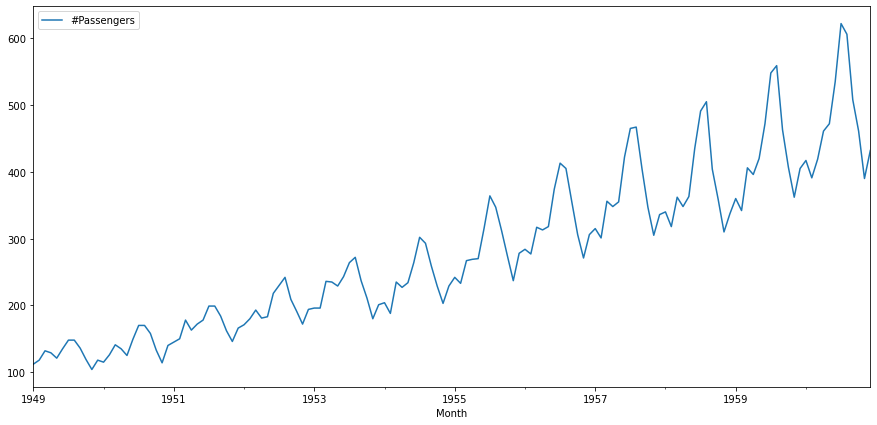

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [5]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['#Passengers'],  
                            model ='additive')

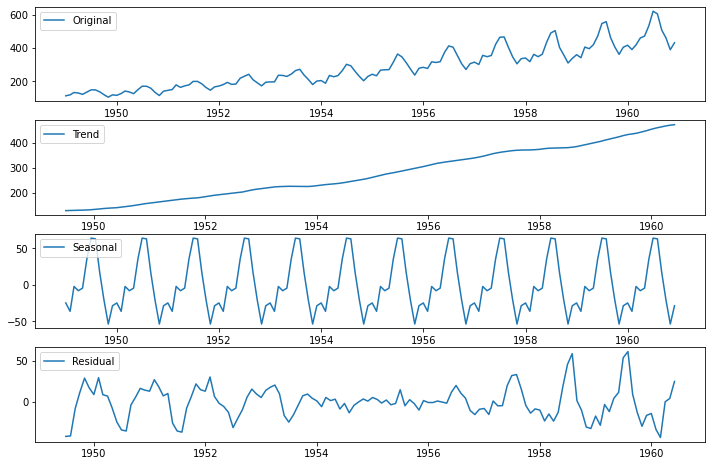

In [6]:
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['#Passengers'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.show()

### Stasioneritas 
Data time series stasioner adalah data yang sifatnya tidak bergantung pada waktu. Oleh karena itu, deret waktu dengan tren, atau dengan musim, tidak stasioner. Metode ARIMA mengasumsikan bahwa data time series bersifat stasioner.

In [7]:
#Is the data stationary?
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df['#Passengers'])
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")
#Since data is not stationary, we may need SARIMA and not just ARIMA

pvalue =  0.9918802434376411  if above 0.05, data is not stationary


pvalue =  0.05421329028382636  if above 0.05, data is not stationary


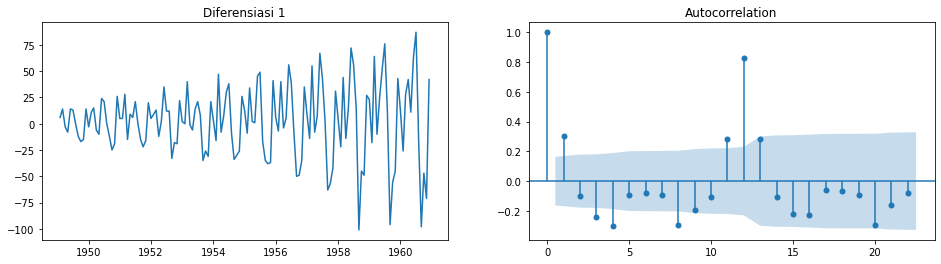

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Jika data tidak statsioner lakukan difrensiasi (y_t - y_t-1)

diff = df['#Passengers'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Diferensiasi 1")

plot_acf(diff,ax=ax2);

adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(diff)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  2.7328918500142407e-29  if above 0.05, data is not stationary


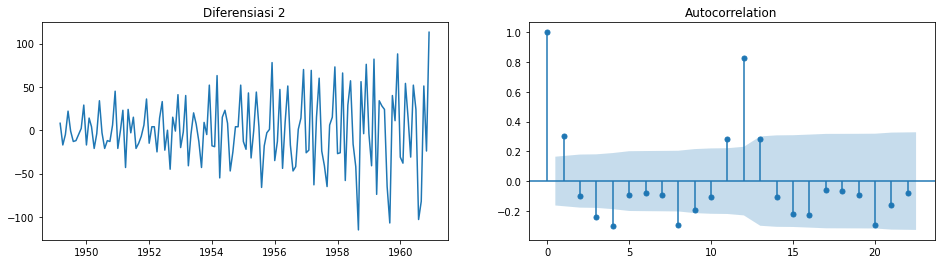

In [9]:
# Jika data tidak statsioner lakukan difrensiasi (y_t - y_t-1)

diff2 = df['#Passengers'].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff2)
ax1.set_title("Diferensiasi 2")

plot_acf(diff,ax=ax2);

adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(diff2)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

In [10]:
# karena dilakukan diferensiasi 2 kali maka orde d = 2

# cara lain untuk mengetahui berapa kali melakukan diferensiasi
# pip install pmdarima

from pmdarima.arima.utils import ndiffs

ndiffs(df['#Passengers'], test = "adf")

0

Menentukan p dan q berdasarkan pola ACF dan PACF
<img src="images/pola ACF PACF.jpg" />

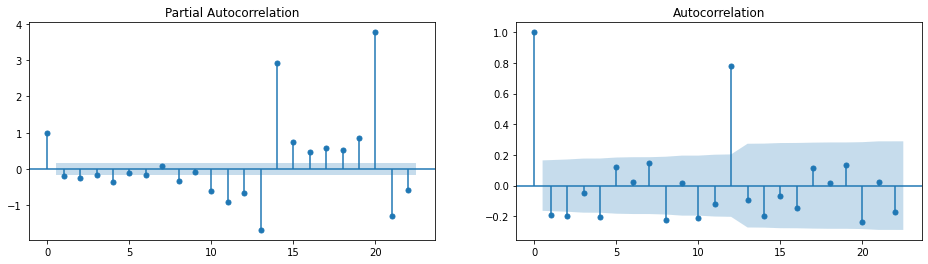

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

plot_pacf(diff2,ax=ax1)
plot_acf(diff2,ax=ax2);

In [12]:
# p = 1, q = 1

from statsmodels.tsa.arima_model import ARIMA

In [13]:
model = ARIMA(df['#Passengers'], order = (1,1,1))
result = model.fit()

C:\Users\Fathu Rahman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Fathu Rahman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Tue, 10 Aug 2021   AIC                           1402.145
Time:                        08:05:00   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.#Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.#Passengers    -1.0000      0.019    -53.425      0.000      -1.037      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3513           +0.0000j            1.3513            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

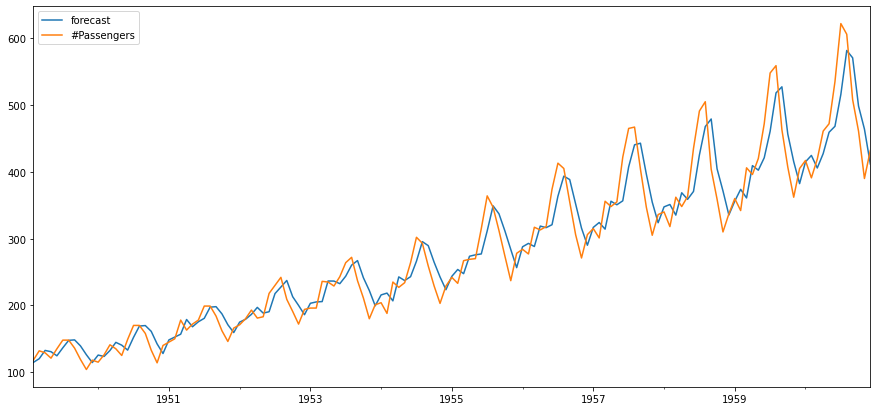

In [15]:
result.plot_predict();

In [16]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(df['#Passengers'], trace=True, error_action='ignore', suppress_warnings=True, d=0)

model.fit(df['#Passengers'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1408.344, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1790.368, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1428.179, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1411.050, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, Time=0.35 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1410.342, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.14 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.528 seconds


ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -699.125
Date:                Tue, 10 Aug 2021   AIC                           1408.249
Time:                        08:05:03   BIC                           1423.098
Sample:                             0   HQIC                          1414.283
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.6007     12.051      1.627      0.104      -4.018      43.219
ar.L1          0.4990      0.131      3.822      0.000       0.243       0.755
ar.L2          0.4314      0.124      3.466      0.001       0.187       0.675
ma.L1          0.8565      0.081     10.540      0.000       0.697       1.016
sigma2       942.2500    107.315      8.780      0.000     731.917    1152.583
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.63   Prob(JB):                         0.64
Heteroskedasticity (H):               6.30   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(df['#Passengers'], order = (2,0,1))
  
result = model.fit()
result.summary()

C:\Users\Fathu Rahman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Fathu Rahman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -701.284
Date:                Tue, 10 Aug 2021   AIC                           1410.569
Time:                        08:05:04   BIC                           1422.448
Sample:                    01-01-1949   HQIC                          1415.396
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5205      0.128      4.060      0.000       0.269       0.772
ar.L2          0.4684      0.125      3.747      0.000       0.223       0.713
ma.L1          0.8625      0.079     10.872      0.000       0.707       1.018
sigma2       958.9202    106.766      8.982      0.000     749.663    1168.177
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 1.63
Prob(Q):                              0.66   Prob(JB):                         0.44
Heteroskedasticity (H):               7.11   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

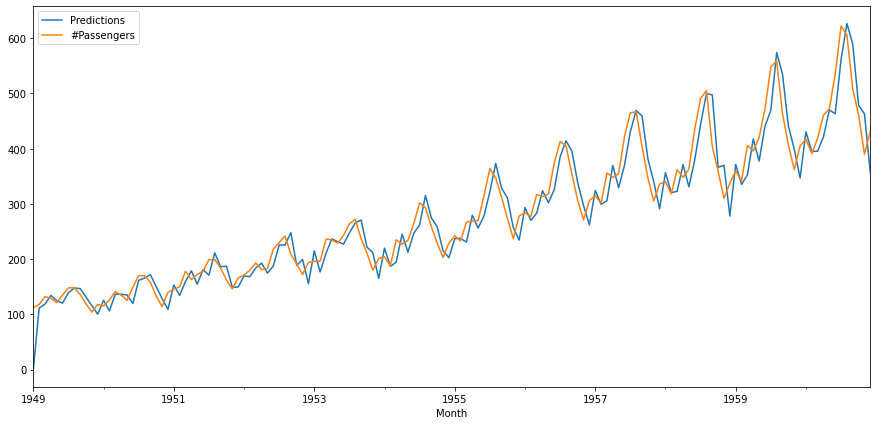

In [19]:
forcast = result.predict().rename("Predictions")
  
# plot predictions and actual values
forcast.plot(legend = True)
df['#Passengers'].plot(legend = True)